## Numerical Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn
import yaml
import sys
import os
sns.set_style('ticks')
%matplotlib inline

In [2]:
# get data for visualization
def getAllData(path):
    data = []
    for i in range(1,11):
        data.append(yaml.safe_load(open(os.path.join(path,"".join(("File"+str(i),'.yaml'))))))
    return data

In [3]:
# get runtime data for visualization
def getRunTimeData(path):
    data = []
    for i in range(1,31):
        data.append(yaml.safe_load(open(os.path.join(path,"".join(("File"+str(i),'.yaml'))))))
    return data

In [4]:
# Collect CPU data for visualization
def getData(path):
    data = []
    cpu = []
    for i in range(1,8):
        data.append(yaml.safe_load(open(os.path.join(path,"".join(("AB"+str(i),'.yaml'))))))
        if(data[i-1]['placement']['alloc_node_res'][2]['name'] != 'vnf_user'):
            cpu.append(data[i-1]['placement']['alloc_node_res'][2]['cpu'])
        else:
            cpu.append(data[i-1]['placement']['alloc_node_res'][1]['cpu'])
    return cpu

In [5]:
# Collect placement data
def getPlacementData(path):
    data = []
    placement = []
    for i in range(1,8):
        data.append(yaml.safe_load(open(os.path.join(path,"".join(("AB"+str(i),'.yaml'))))))
        placement.append(data[i-1]['placement']['vnfs'][0]['name']+":"+data[i-1]['placement']['vnfs'][0]['node'])
        placement.append(data[i-1]['placement']['vnfs'][1]['name']+":"+data[i-1]['placement']['vnfs'][1]['node'])
        placement.append(data[i-1]['placement']['vnfs'][2]['name']+":"+data[i-1]['placement']['vnfs'][2]['node'])
    return placement

In [6]:
#data
groundTruth = []
linear = []
xgb = []
gb = []


# CPU vars
CPU_groundTruth = []
CPU_linear = []
CPU_xgboost = []
CPU_gb = []

# Instances vars
I_groundTruth = []
I_linear = []
I_xgboost = []
I_gb = []


# End_to_End_Delays vars
D_groundTruth = []
D_linear = []
D_xgboost = []
D_gb = []

# Runtime vars
R_groundTruth = []
R_linear = []
R_xgboost = []
R_gb = []




# Syn. Log data
inv = getAllData('Analysis/Abilene/fw1chain/new/inv')
xgb = getAllData('Analysis/Abilene/fw1chain/new/XGB')
linear = getAllData('Analysis/Abilene/fw1chain/new/Linear')
gb = getAllData('Analysis/Abilene/fw1chain/new/gb')
nodes = [1, 3, 3, 4, 5, 6, 7, 8, 9, 10] 
datasets = [inv,linear,xgb,gb]
totalCPU = 0.0
max_delay = 0
avg_run = 0.0

CPU_models = [CPU_groundTruth,CPU_linear,CPU_xgboost,CPU_gb]
for m in range(0,len(CPU_models)):
    for i in range(0,10):
        print("\nFile",i+1,"\n")
        totalCPU = 0
        for j in range(0,len(datasets[m][i]['placement']['alloc_node_res'])):
            print(datasets[m][i]['placement']['alloc_node_res'][j])
            totalCPU += datasets[m][i]['placement']['alloc_node_res'][j]['cpu']
        CPU_models[m].append(totalCPU)
        print(totalCPU)

Instance_models = [I_groundTruth,I_linear,I_xgboost,I_gb]
End_delays = [D_groundTruth,D_linear,D_xgboost,D_gb]
# Syn. log data
inv = getAllData('Analysis/Abilene/fw3chain/inv')
xgb = getAllData('Analysis/Abilene/fw3chain/XGB')
linear = getAllData('Analysis/Abilene/fw3chain/Linear')
gb = getAllData('Analysis/Abilene/fw3chain/gb')

datasets = [inv,linear,xgb,gb]
   
for m in range(0,len(Instance_models)):
    for i in range(0,10):
        #print("\nFile",i+1,"\n")
        totalInstances = 0
        max_delay = 0
        totalInstances = datasets[m][i]['metrics']['num_instances']
        max_delay = datasets[m][i]['metrics']['max_endToEnd_delay']
        Instance_models[m].append(totalInstances)
        End_delays[m].append(max_delay)
        #print(max_delay)        

        
# Real data
inv = getRunTimeData('Extended/Synthetic_ML_Model_Results/inv/Source9/')
xgb = getRunTimeData('Extended/Synthetic_ML_Model_Results/XGBoost/Source9/')
linear = getRunTimeData('Extended/Synthetic_ML_Model_Results/linear/Source9/')
gb = getRunTimeData('Extended/Synthetic_ML_Model_Results/gb/Source9/')

datasets = [inv,linear,xgb,gb]
runTimes = [R_groundTruth, R_linear, R_xgboost, R_gb]
for m in range(0,len(runTimes)):
    avg_run = 0
    for i in range(0,30):
        totalInstances = 0
        avg_run += datasets[m][i]['metrics']['runtime']
        runTimes[m].append(avg_run)



File 1 

{'cpu': 0.41421356237309515, 'mem': 0, 'name': 'vnf_web', 'node': 'pop0'}
{'cpu': 0.41421356237309515, 'mem': 0, 'name': 'vnf_fw1', 'node': 'pop0'}
{'cpu': 0, 'mem': 0, 'name': 'vnf_user', 'node': 'pop0'}
0.8284271247461903

File 2 

{'cpu': 0, 'mem': 0, 'name': 'vnf_user', 'node': 'pop0'}
{'cpu': 1.0, 'mem': 0, 'name': 'vnf_web', 'node': 'pop2'}
{'cpu': 1.0, 'mem': 0, 'name': 'vnf_fw1', 'node': 'pop0'}
2.0

File 3 

{'cpu': 0.41421356237309515, 'mem': 0, 'name': 'vnf_fw1', 'node': 'pop1'}
{'cpu': 0, 'mem': 0, 'name': 'vnf_user', 'node': 'pop0'}
{'cpu': 1.0, 'mem': 0, 'name': 'vnf_fw1', 'node': 'pop0'}
{'cpu': 1.0, 'mem': 0, 'name': 'vnf_web', 'node': 'pop2'}
{'cpu': 0.41421356237309515, 'mem': 0, 'name': 'vnf_web', 'node': 'pop1'}
2.82842712474619

File 4 

{'cpu': 1.0, 'mem': 0, 'name': 'vnf_fw1', 'node': 'pop1'}
{'cpu': 1.0, 'mem': 0, 'name': 'vnf_fw1', 'node': 'pop0'}
{'cpu': 1.0, 'mem': 0, 'name': 'vnf_web', 'node': 'pop10'}
{'cpu': 1.0, 'mem': 0, 'name': 'vnf_web', 'nod

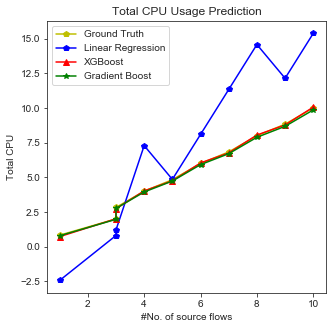

In [24]:
# total CPU plot

modelProperties = [{"name":"Ground Truth","color": "y","marker":"p"},{"name":"Linear Regression","color":"b","marker":"p"},{"name":"XGBoost","color":"r","marker":"^"},{"name":"Gradient Boost","color":"g","marker":"*"}]
fig = plt.figure(figsize=(5, 5))
for i in range(0,len(CPU_models)):
    plt.plot(nodes, CPU_models[i], color=modelProperties[i]["color"], marker=modelProperties[i]["marker"], label=modelProperties[i]["name"])

plt.xlabel('#No. of source flows')
plt.ylabel('Total CPU')
plt.title('Total CPU Usage Prediction')
plt.legend()
plt.show()

Text(0, 0.5, 'No. of Instances')

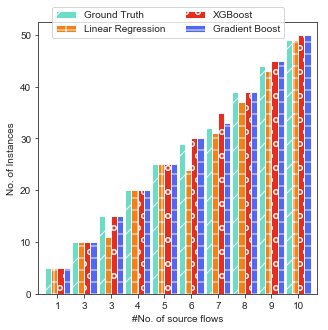

In [25]:
colors = ["#5DD9C1","#F17300","#E3170A","#4056F4"]
patterns = ['/','+','o','-']
df=pd.DataFrame(Instance_models,columns=nodes,index=["Ground Truth","Linear Regression", "XGBoost", "Gradient Boost"])
df = df.T
ax = df.plot(figsize=(5,5),kind='bar',rot=0, width=.93,color = colors,alpha=.9)
bars = ax.patches
hatches = ''.join(h*len(df) for h in patterns)
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
ax.legend(loc='center right', bbox_to_anchor=(.9,1), ncol=2)

ax.set_xlabel('#No. of source flows')
ax.set_ylabel('No. of Instances')


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


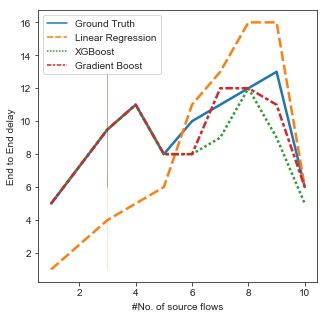

In [26]:
index=["Ground Truth","Linear Regression", "XGBoost", "Gradient Boost"]
df=pd.DataFrame(End_delays,columns=nodes,index=index)
df = df.T
plt.figure(figsize=(5,5))
sns.lineplot(data = df,linewidth=2.5)

#for col in index:
    #sns.kdeplot(df[col],shade= True)

plt.xlabel('#No. of source flows')
plt.ylabel('End to End delay')
plt.legend()

Text(0, 0.5, 'Runtime (ms)')

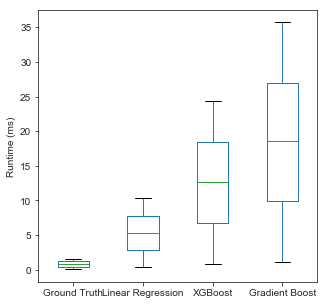

In [27]:
df=pd.DataFrame(runTimes,index=["Ground Truth","Linear Regression", "XGBoost","Gradient Boost"])
df = df.T
ax= df.plot(figsize=(5,5),kind='box',rot=0)
plt.ylabel('Runtime (ms)')



## Visualization
##### Some nice plots

In [11]:
# data rate vs CPU
fig = plt.figure(figsize=(18, 18))

plt.plot(dataRate, linear, color='y', marker="*", markersize=15, label="Linear Regression")
plt.plot(dataRate, groundTruth, color='orange', marker=".", markersize=15, label="Ground Truth")
plt.plot(dataRate, xgboost, color='b',marker="^", markersize=15, label="XGBoost")
plt.plot(dataRate, gradient, color='r',marker="+", markersize=15, label="Gradient Boost")
plt.plot(dataRate, svm, color='magenta',marker="p", markersize=15, label="SVM")





plt.xlabel('Throughput/Data rate')
plt.ylabel('CPU')
plt.title('CPU prediction')
plt.legend()
plt.show()

NameError: name 'dataRate' is not defined

<Figure size 1296x1296 with 0 Axes>

In [ ]:
# data rate vs CPU
fig = plt.figure(figsize=(18, 18))

plt.plot(dataRate, linear, color='y', marker="*", markersize=15, label="Linear Regression")
plt.plot(dataRate, groundTruth, color='orange', marker=".", markersize=15, label="Ground Truth")
plt.plot(dataRate, xgboost, color='b',marker="^", markersize=15, label="XGBoost")
plt.plot(dataRate, gradient, color='r',marker="+", markersize=15, label="Gradient Boost")
plt.plot(dataRate, svm, color='magenta',marker="p", markersize=15, label="SVM")
plt.plot(dataRate, ridge, color='violet',marker="P", markersize=15, label="Ridge")
plt.plot(dataRate, randomForest, color='green',marker="d", markersize=15, label="Random Forest")


plt.xlabel('Throughput/Data rate')
plt.ylabel('CPU')
plt.title('CPU prediction')
plt.legend()
plt.show()